In [193]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, Input

In [194]:
data1 = pd.read_csv("train.csv")
y_train = data1.Survived
del data1["Survived"]
x_train = data1.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [195]:
data2 = pd.read_csv("test.csv")
y_test = pd.read_csv("gender_submission.csv").Survived
x_test = data2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [196]:
x_train.Age /= 100
x_test.Age /= 100
x_train[x_train.Age.isnull()] = 0
x_test[x_test.Age.isnull()] = 0

m = 6
x_train.Parch /= m
x_test.Parch /= m

m = max(x_train.Fare)
x_train.Fare /= m
x_test.Fare /= m

x_train.Sex[x_train.Sex == "male"] = 1
x_train.Sex[x_train.Sex == "female"] = 0

x_test.Sex[x_test.Sex == "male"] = 1
x_test.Sex[x_test.Sex == "female"] = 0

x_train[["PC1", "PC2", "PC3"]] = 0
x_train["PC1"][x_train.Pclass == 1] = 1
x_train["PC2"][x_train.Pclass == 2] = 1
x_train["PC3"][x_train.Pclass == 3] = 1
del x_train["Pclass"]

x_test[["PC1", "PC2", "PC3"]] = 0
x_test["PC1"][x_test.Pclass == 1] = 1
x_test["PC2"][x_test.Pclass == 2] = 1
x_test["PC3"][x_test.Pclass == 3] = 1
del x_test["Pclass"]

x_train[["QC1", "QC2", "QC3"]] = 0
x_train["QC1"][x_train.Embarked == "C"] = 1
x_train["QC2"][x_train.Embarked == "Q"] = 1
x_train["QC3"][x_train.Embarked == "S"] = 1
del x_train["Embarked"]

x_test[["QC1", "QC2", "QC3"]] = 0
x_test["QC1"][x_test.Embarked == "C"] = 1
x_test["QC2"][x_test.Embarked == "Q"] = 1
x_test["QC3"][x_test.Embarked == "S"] = 1
del x_test["Embarked"]

x_test

/var/folders/p8/hs842n8x29x1xnhy3skzz61h0000gn/T/ipykernel_3889/4086159060.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.Sex[x_train.Sex == "male"] = 1
/var/folders/p8/hs842n8x29x1xnhy3skzz61h0000gn/T/ipykernel_3889/4086159060.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.Sex[x_train.Sex == "female"] = 0
/var/folders/p8/hs842n8x29x1xnhy3skzz61h0000gn/T/ipykernel_3889/4086159060.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

,Sex,Age,SibSp,Parch,Fare,PC1,PC2,PC3,QC1,QC2,QC3
0,1,0.345,0,0.000000,0.015282,0,0,1,0,1,0
1,0,0.470,1,0.000000,0.013663,0,0,1,0,0,1
2,1,0.620,0,0.000000,0.018909,0,1,0,0,1,0
3,1,0.270,0,0.000000,0.016908,0,0,1,0,0,1
4,0,0.220,1,0.166667,0.023984,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,0,0.000,0,0.000000,0.000000,0,0,0,0,0,0
414,0,0.390,0,0.000000,0.212559,1,0,0,1,0,0
415,1,0.385,0,0.000000,0.014151,0,0,1,0,0,1
416,0,0.000,0,0.000000,0.000000,0,0,0,0,0,0


In [197]:
x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)

x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((891, 11), (891,), (418, 11), (418,))

In [198]:
model = tf.keras.Sequential([
    Input((11,)),
    Dense(64, "relu"),
    Dropout(0.1),
    Dense(32, "relu"),
    Dropout(0.1),
    Dense(8, "relu"),
    Dense(1, "sigmoid"),
])
model.compile("adam", "binary_crossentropy", ['accuracy'], )
his = model.fit(x_train, y_train, 32, 16,
                validation_split=0.2
                ).history

Epoch 1/16
28/28 [==============================] - 0s 619us/step - loss: 0.6762 - accuracy: 0.6173
Epoch 2/16
28/28 [==============================] - 0s 607us/step - loss: 0.6187 - accuracy: 0.6723
Epoch 3/16
28/28 [==============================] - 0s 510us/step - loss: 0.5707 - accuracy: 0.7273
Epoch 4/16
28/28 [==============================] - 0s 550us/step - loss: 0.5225 - accuracy: 0.7699
Epoch 5/16
28/28 [==============================] - 0s 500us/step - loss: 0.4962 - accuracy: 0.7789
Epoch 6/16
28/28 [==============================] - 0s 541us/step - loss: 0.4900 - accuracy: 0.7722
Epoch 7/16
28/28 [==============================] - 0s 490us/step - loss: 0.4906 - accuracy: 0.7632
Epoch 8/16
28/28 [==============================] - 0s 517us/step - loss: 0.4834 - accuracy: 0.7778
Epoch 9/16
28/28 [==============================] - 0s 499us/step - loss: 0.4798 - accuracy: 0.7834
Epoch 10/16
28/28 [==============================] - 0s 600us/step - loss: 0.4727 - accuracy: 0.7823

In [199]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 489us/step - loss: nan - accuracy: 0.8397


[nan, 0.839712917804718]

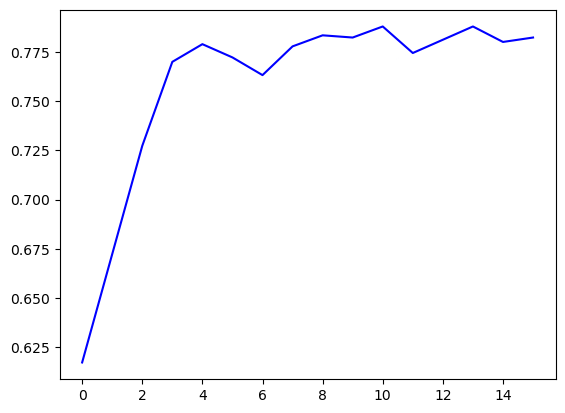

In [200]:
plt.plot(his["accuracy"], c="b")
plt.plot(his["val_accuracy"], c="r")

In [201]:
res = pd.read_csv("gender_submission.csv")
pr = model.predict(x_test)
pr.shape = (-1,)
res.Survived = 0
res.Survived[pr >= 0.5] = 1
res.to_csv('result.csv', index=False)

14/14 [==============================] - 0s 786us/step
